In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, r2_score

In [104]:
file_path_train = r'C:\Users\User\Desktop\Main\7 semester\ML\train_lab4.csv'
df_train = pd.read_csv(file_path_train)
df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [105]:
file_path_train = r'C:\Users\User\Desktop\Main\7 semester\ML\test.csv'
df_test = pd.read_csv(file_path_train)
df_test.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
0,0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
1,0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
2,0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
3,0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
4,0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [106]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [107]:
print(df_train.isnull().sum())

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64


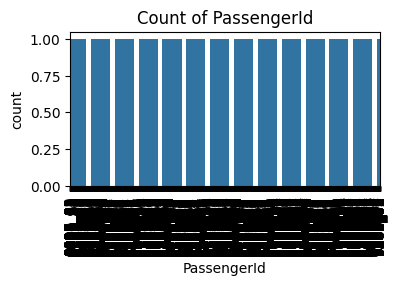

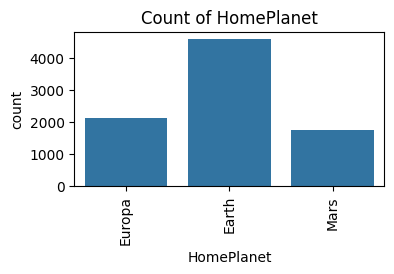

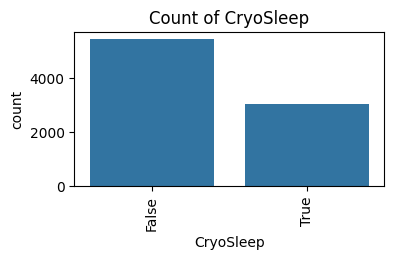

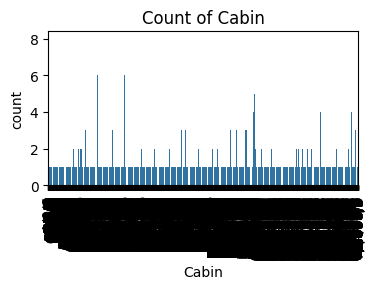

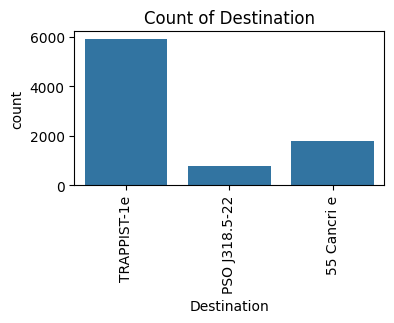

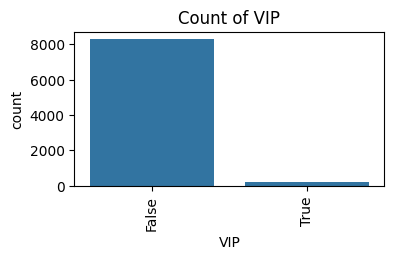

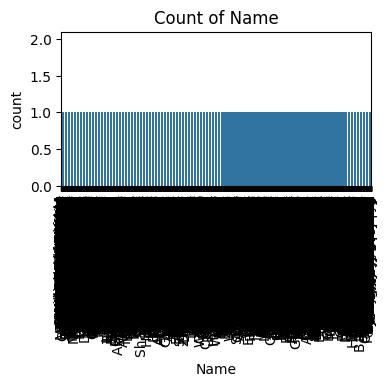

In [5]:
for column_name in df_train.columns:
    if df_train[column_name].dtype == 'object':
        plt.figure(figsize=(4, 2))  
        sns.countplot(x=column_name, data=df_train)
        plt.title(f'Count of {column_name}')
        plt.xticks(rotation=90) 
        plt.show()

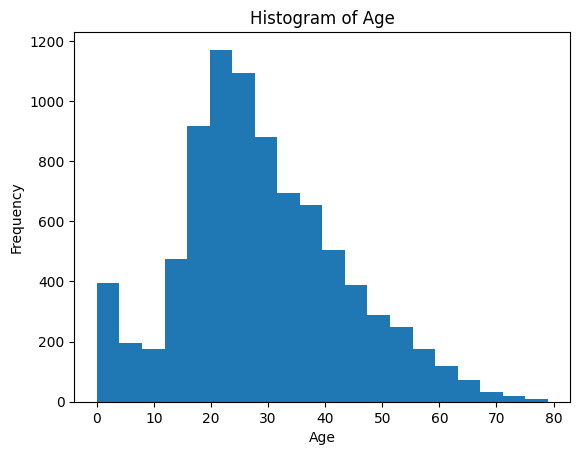

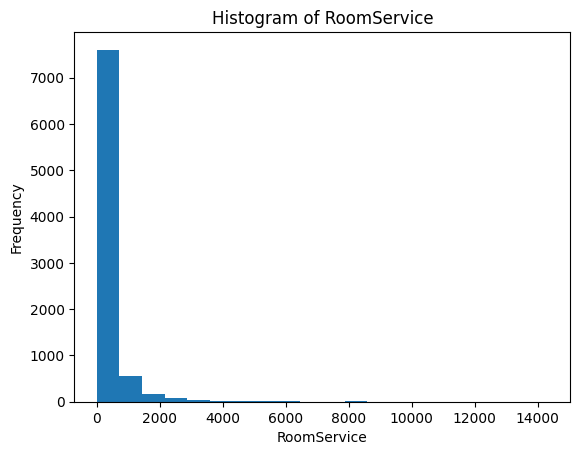

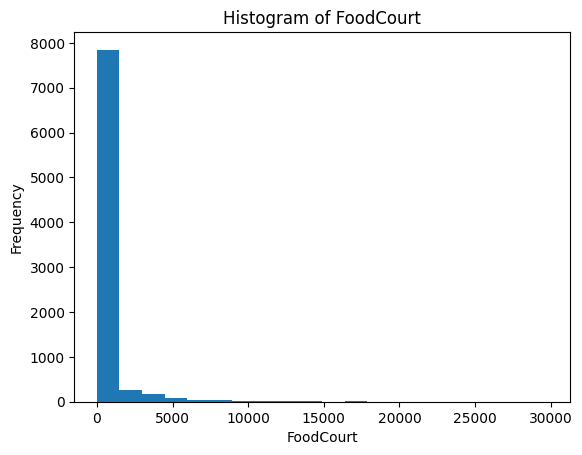

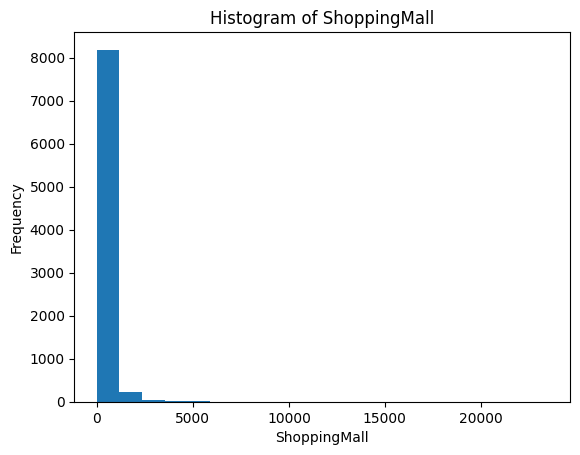

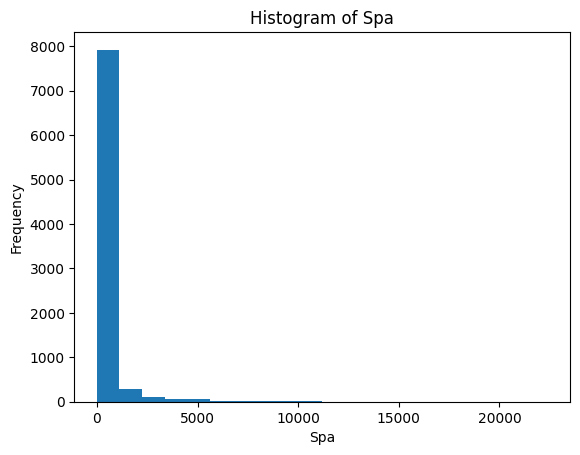

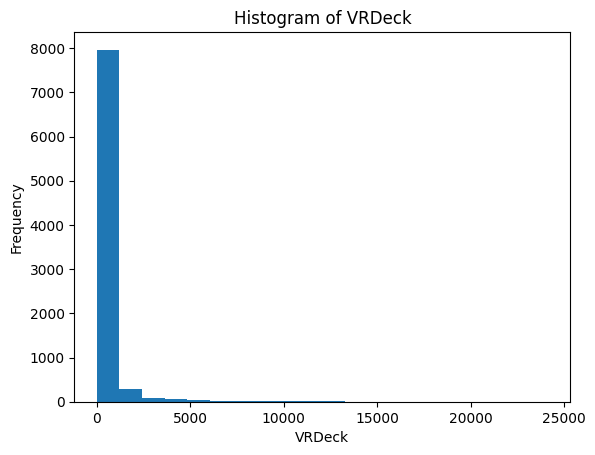

In [6]:
for column_name in df_train.columns:
    if df_train[column_name].dtype in ['int64', 'float64']:  # Check if it's a numerical column
        plt.hist(df_train[column_name], bins=20)  # Adjust the number of bins as needed
        plt.title(f'Histogram of {column_name}')
        plt.xlabel(column_name)
        plt.ylabel('Frequency')
        plt.show()

In [94]:
df_train = df_train.drop(columns=['PassengerId', 'Name', 'VRDeck', 'Spa', 'ShoppingMall', 'FoodCourt', 'RoomService', ], axis=1)

In [95]:
print(df_train.isna().sum())

HomePlanet     201
CryoSleep      217
Cabin          199
Destination    182
Age            179
VIP            203
Transported      0
dtype: int64


In [96]:
columns_to_fill = ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP']
for column in columns_to_fill:
    mode_value = df_train[column].mode()[0]  # Calculate the mode of the column
    df_train[column].fillna(mode_value, inplace=True)
print(df_train.isna().sum())

HomePlanet       0
CryoSleep        0
Cabin            0
Destination      0
Age            179
VIP              0
Transported      0
dtype: int64


In [97]:
mean_age = df_train['Age'].mean()
df_train['Age'].fillna(mean_age, inplace=True)
print(df_train.isna().sum())

HomePlanet     0
CryoSleep      0
Cabin          0
Destination    0
Age            0
VIP            0
Transported    0
dtype: int64


In [98]:
boolean_columns = df_train.select_dtypes(include=['bool']).columns
df_train[boolean_columns] = df_train[boolean_columns].astype(int)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   HomePlanet   8693 non-null   object 
 1   CryoSleep    8693 non-null   int32  
 2   Cabin        8693 non-null   object 
 3   Destination  8693 non-null   object 
 4   Age          8693 non-null   float64
 5   VIP          8693 non-null   int32  
 6   Transported  8693 non-null   int32  
dtypes: float64(1), int32(3), object(3)
memory usage: 373.7+ KB


In [99]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Iterate through the DataFrame and encode categorical columns
for column in df_train.columns:
    if df_train[column].dtype == 'object':  # Check if the column contains strings (categorical data)
        df_train[column] = label_encoder.fit_transform(df_train[column])

# Display the encoded DataFrame
df_train

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,Transported
0,1,0,149,2,39.0,0,0
1,0,0,2184,2,24.0,0,1
2,1,0,1,2,58.0,1,0
3,1,0,1,2,33.0,0,0
4,0,0,2186,2,16.0,0,1
...,...,...,...,...,...,...,...
8688,1,0,146,0,41.0,1,0
8689,0,1,5280,1,18.0,0,0
8690,0,0,5285,2,26.0,0,1
8691,1,0,2131,0,32.0,0,0


In [100]:
# Separate features (X) and target (y)
X = df_train.drop(columns=['Transported'])
y = df_train['Transported']

In [76]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the data
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 0.44038529, -0.73277002, -1.53191771,  0.62054498,  0.70943692,
        -0.15306307],
       [-0.81725903, -0.73277002, -0.51633162,  0.62054498, -0.33671733,
        -0.15306307],
       [ 0.44038529, -0.73277002, -1.60577851,  0.62054498,  2.03456565,
         6.53325471],
       ...,
       [-0.81725903, -0.73277002,  1.03125189,  0.62054498, -0.1972301 ,
        -0.15306307],
       [ 0.44038529, -0.73277002, -0.54278177, -1.83368499,  0.2212316 ,
        -0.15306307],
       [ 0.44038529, -0.73277002, -0.54278177,  0.62054498,  1.05815501,
        -0.15306307]])

In [108]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

In [102]:
from collections import Counter

class KNN:
    def __init__(self, k=3):
        self.k = k

    def fit(self, X, y):
        self.X_train = X
        self.y_train = y

    def euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))

    def predict(self, X):
        predictions = [self._predict(x) for x in X]
        return predictions

    def _predict(self, x):
        # compute the distance
        distances = [self.euclidean_distance(x, x_train) for x_train in self.X_train]
    
        # get the closest k
        k_indices = np.argsort(distances)[:self.k]
        k_nearest_labels = [self.y_train[i] for i in k_indices]

        # majority voye
        most_common = Counter(k_nearest_labels).most_common()
        return most_common[0][0]

In [103]:
X_train_array = X_train.values
y_train_array = y_train.values
X_test_array = X_test.values
y_test_array = y_test.values

# Initialize and train the KNN classifier
knn = KNN(k=5)
knn.fit(X_train_array, y_train_array)

# Make predictions on test data
predictions = knn.predict(X_test_array)
print(r2_score(y_test_array, predictions))

-0.7778426070953206
